# Регрессия с SVM и определение языка слов

## Регрессия с SVM (3 балла)

Неудивительно, что принципы SVM так же прекрасно ложатся на задачу регрессии.

Загрузите набор данных из *titanium.csv*<br/>
Мы будем решать задачу восстановления столбца 'y' по столбцу 'x'.

## Визуализация данных (1 балл)

Выполните стандартную предобработку данных и выведите их на графике.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.svm import SVR, SVC
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("titanium.csv")
df.describe()

,x,y
count,49.000000,49.000000
mean,825.000000,0.804592
std,142.886902,0.375022
min,585.000000,0.601000
25%,705.000000,0.627000
50%,825.000000,0.663000
75%,945.000000,0.730000
max,1065.000000,2.169000


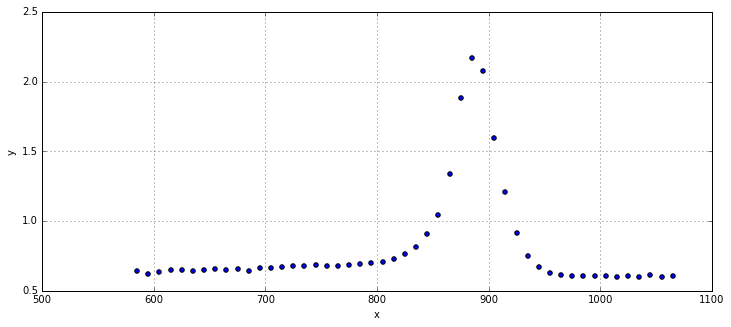

In [3]:
df.plot.scatter(x='x', y='y', figsize=(12,5), grid=True)

## Обучение моделей (2 балла)

Рассмотрите 3 ядра: 
* Линейное
* Полиномиальное (degree = 3, gamma = 6, coef0 = 1)
* RBF (gamma = 6, coef0 = 1)

Во всех случаях установить ширину трубки `epsilon=0.01`

Для каждого из ядер:
1. Постройте графики зависимости ошибки от параметра $C$ (ось графика со значениями параметра $C$ должна быть в логарифмической шкале). Ошибка измеряется как средняя абсолютная ошибка. 
2. Для наулучшего параметра $С$ постройте график с данными и предстазанием по svm

В каких случаях возникает эффекты недообучения, переобучения?

In [4]:
from sklearn.metrics import mean_absolute_error
from sklearn import preprocessing

In [5]:
# standartization
data = preprocessing.scale(df['x'])
data = data.reshape(-1,1)
target = df.y.values

In [6]:
C = np.logspace(-2, 2, 10)
# computes mae according to C value
def compute_errors(kernel, C, gamma='auto', coef0=0.0):
    mae=[]
    for c in C:
        model = SVR(kernel=kernel, epsilon=0.01, C=c, gamma=gamma, coef0=coef0)
        model.fit(data, target)
        prediction = model.predict(data)
        mae.append(mean_absolute_error(target,prediction))
    return mae, model

# makes predictions using best C
def make_predicitons(mae, model, data):
    best_c_index = np.argmin(mae)
    predictions = model.set_params(C=C[best_c_index]).fit(data,target).predict(data)
    return predictions

### Linear kernel

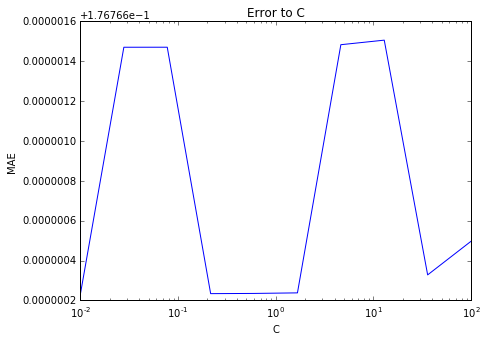

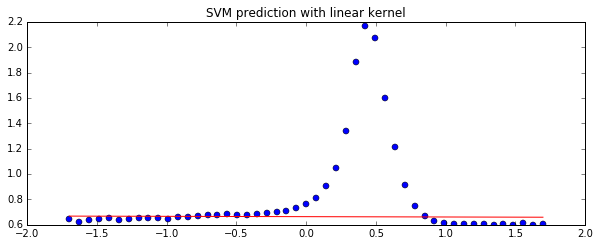

In [7]:
linear_mae, linear_model = compute_errors('linear', C)
plt.figure(figsize=(7,5))
plt.semilogx(C, linear_mae)
plt.title("Error to C")
plt.ylabel('MAE')
plt.xlabel('C')
plt.show()

linear_prediction = make_predicitons(linear_mae, linear_model, data)
plt.figure(1, figsize=(10,8))
plt.subplot(211)
plt.plot(data, target,'bo', data, linear_prediction,'r')
plt.title('SVM prediction with linear kernel')

Из графиков явно заметно, что значение ошибки скачет при разных C, а также, что алгоритм недообучается при линейном ядре.

### Polynomial kernel

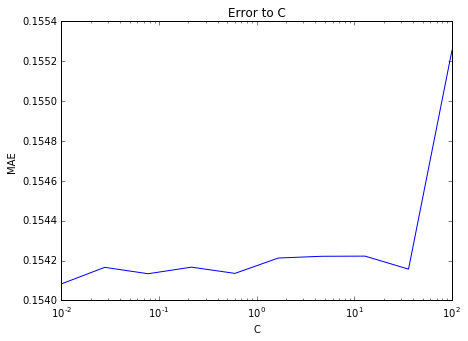

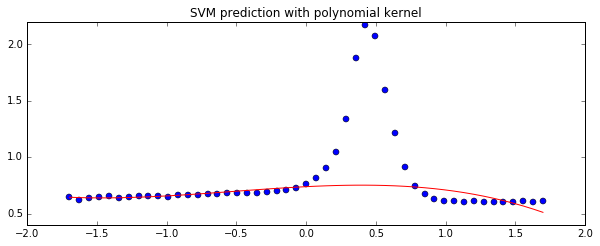

In [8]:
pol_mae, pol_model = compute_errors('poly', C, gamma=6, coef0=1)
plt.figure(figsize=(7,5))
plt.semilogx(C, pol_mae)
plt.title("Error to C")
plt.ylabel('MAE')
plt.xlabel('C')
plt.show()

pol_prediction = make_predicitons(pol_mae, pol_model, data)
plt.figure(1, figsize=(10,8))
plt.subplot(211)
plt.plot(data, target,'bo', data, pol_prediction,'r')
plt.title('SVM prediction with polynomial kernel')

Здесь также видно явное недообучение.

### RBF kernel

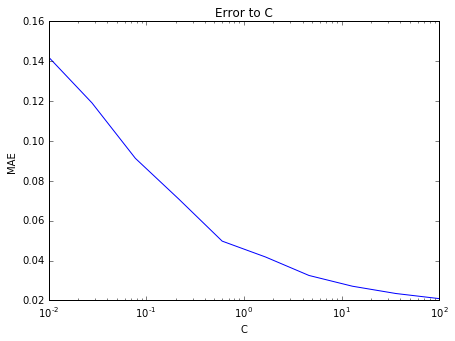

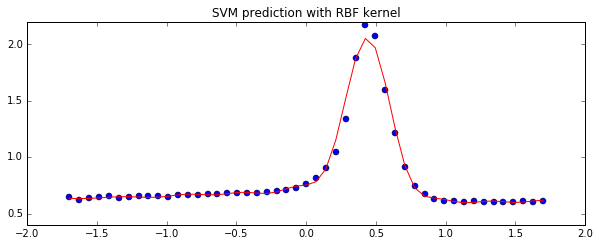

In [9]:
rbf_mae, rbf_model = compute_errors('rbf', C, gamma=6, coef0=1)
plt.figure(figsize=(7,5))
plt.semilogx(C, rbf_mae)
plt.title("Error to C")
plt.ylabel('MAE')
plt.xlabel('C')
plt.show()

rbf_prediction = make_predicitons(rbf_mae, rbf_model, data)
plt.figure(1, figsize=(10,8))
plt.subplot(211)
plt.plot(data, target,'bo', data, rbf_prediction,'r')
plt.title('SVM prediction with RBF kernel')

При RBF ядре недообучение отсутствует. Значение ошибки падает с каждым новым C. Алгоритм показывает оптимальный результат.

**Вывод**: лучший результат показывает SVM регрессия с ядром RBF. Результат при линейном и полиномиальном ядре далёк от оптимального, поскольку алгоритм при этих ядрах недообучается.

# Определение языка слова (7 баллов)

В данном задании вам необходимо определить, на каком языке написано слово.

Вам будет дано два текста - первые предложения произведения "Война и Мир" на английком и испанском, разбитые на слова. У слов нет общепринятого числового представления, поэтому мы предлагаем вам реализовать собственноге ядро для SVM, основанное на редакторском расстоянии или [расстоянии Левенштейна](https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D1%81%D1%81%D1%82%D0%BE%D1%8F%D0%BD%D0%B8%D0%B5_%D0%9B%D0%B5%D0%B2%D0%B5%D0%BD%D1%88%D1%82%D0%B5%D0%B9%D0%BD%D0%B0). 

Имплементировать расстояние Левенштейна не нужно - можно взять любую доступную реализацию, например [здесь](https://github.com/toastdriven/pylev) или [здесь](https://github.com/ztane/python-Levenshtein).

## Загрузка (1 балл)

Загрузите данные из файлов *war_and_peace_es.txt* и *war_and_peace_en.txt*.<br/> 
В результате вы должны получить pandas.DataFrame со столбцами *index* | *word* | *label*, где *index* - это индекс pandas, *word* - это слово и *label* - это метка класса (0 или 1)

In [10]:
# read files
es = open('war_and_peace_es.txt')
spanish = []
for line in es:
    spanish.append(line[:-1])
# make labels
es_labels = np.zeros(len(spanish), dtype=int)

en = open('war_and_peace_en.txt')
english = []
for line in en:
    english.append(line[:-1])
en_labels = np.ones(len(english), dtype=int)

# make dataframe
df1 = pd.DataFrame(list(zip(spanish, es_labels)), columns=['word', 'label'])
df2 = pd.DataFrame(list(zip(english, en_labels)), columns=['word', 'label'])
df = df1.append(df2, ignore_index=True)
df.head()

,word,label
0,guerra,0
1,pace,0
2,lev,0
3,nicoevic,0
4,tolstj,0


## Подготовка данных (2 балла)

Особенностью пользовательского ядра в sklean.SVC является то, что на вход оно должно принимать именно вектора чисел.<br/>
В нашем случае это будут индексы соответствующих слов из корпуса. То есть вместо вектора ['treat', 'celebrit', 'prince', ...] на вход в ядро подается вектор из индексов [9209, 11145, 7735, ...] с помощью которых вы будете находить сами слова.

Прежде чем мы начнем строить ядро, надо подготовить данные. Для этого:
1. Задайте переменную RND_SEED, которая будет использоваться в любых генераторах случайных чисел в вашем коде (обычно параметр "random_seed")
2. Случайным образом перемешайте и заново проиндексируйте таблицу, полученную выше (используйте методы df.sample() и df.reset_index())
3. Ядро может вычисляться достаточно долго, поэтому можете урезать таблицу, но оставить в ней не менее 1000 слов.
4. Разбейте данные на обучающую и контрольную выборку в пропорции 60/40

В результате вы должны получить вектор-столбец X_train, X_test с **индексами** слов и векторы y_train, y_test с метками классов.

In [11]:
from sklearn.cross_validation import train_test_split

In [12]:
RND_SEED = 2016

df_part = df.sample(n=1000, random_state=RND_SEED)
df_part = df_part.reset_index(drop=True)

X_train, X_test = train_test_split(df_part.word.index.values, test_size=0.4, random_state=RND_SEED)
Y_train, Y_test = train_test_split(df_part.label.values, test_size=0.4, random_state=RND_SEED)

# transforming X_train, X_test to vector form 
X_train = X_train.reshape((-1,1))
X_test = X_test.reshape((-1,1))

## Расчет ядра (3 балла)

Теперь напишем собственное ядро для классификации строк. Для сравнения строк будем использовать [расстояние Левенштейна](https://ru.wikipedia.org/wiki/Расстояние_Левенштейна). Реализацию этого расстояния можно получить одним из двух способов:
* скопировать функцию wfi_levenshtein из файла [pylev.py](https://github.com/toastdriven/pylev/blob/master/pylev.py)
* поставить пакет [editdistance](https://pypi.python.org/pypi/editdistance) (будет работать быстрее, чем предыдущая реализация, но могут возникнуть проблемы с установкой)

Ядро для сравнения строк должно принимать максимальное значение, когда слова одинаковы, и минимальное, когда очень отличаются. Это противоположно свойствам расстояния Левенштейна: оно равно 0, когда слова одинаковы, и максимально, когда слова разные. Поэтому подставьте значение расстояния Левенштейна в какое-нибудь ядро, зависящее от расстояния между объектами (например, гауссовское).

Функция, реализующая расчет ядра должна принимать две матрицы $U$ и $V$ с признаковым описанием объектов (во время обучения они обе относятся к обучающей выборке, а во время применения - одна матрица относится к обучающей выборке, а другая к контрольной).
Функция должна возвращать матрицу значений ядра для всех объектов попарно: $G_{ij} = K(U_i, V_j)$. Здесь $U_i$ — i-ый объект выборки $U$, а $V_j$ — j-ый объект выборки $V$.

Сделайте следующее:
1. Напишите функцию *string_kernel(U, V)*, расчитывающую матрицу ядра $G_{ij}$
2. Визуализируйте матрицу только для тренировочной выборки (функция plt.imshow()).

In [13]:
def wfi_levenshtein(string_1, string_2):
    """
    Calculates the Levenshtein distance between two strings.
    This version uses an iterative version of the Wagner-Fischer algorithm.
    Usage::
        >>> wfi_levenshtein('kitten', 'sitting')
        3
        >>> wfi_levenshtein('kitten', 'kitten')
        0
        >>> wfi_levenshtein('', '')
        0
    """
    if string_1 == string_2:
        return 0

    len_1 = len(string_1)
    len_2 = len(string_2)

    if len_1 == 0:
        return len_2
    if len_2 == 0:
        return len_1

    if len_1 > len_2:
        string_2, string_1 = string_1, string_2
        len_2, len_1 = len_1, len_2

    d0 = [i for i in range(len_2 + 1)]
    d1 = [j for j in range(len_2 + 1)]

    for i in range(len_1):
        d1[0] = i + 1
        for j in range(len_2):
            cost = d0[j]

            if string_1[i] != string_2[j]:
                # substitution
                cost += 1

                # insertion
                x_cost = d1[j] + 1
                if x_cost < cost:
                    cost = x_cost

                # deletion
                y_cost = d0[j + 1] + 1
                if y_cost < cost:
                    cost = y_cost

            d1[j + 1] = cost

        d0, d1 = d1, d0

    return d0[-1]

Будем использовать ядро вида $K(x,y)=exp^{-||x-y||^2}$, в котором расстояние между объектами измеряется как расстояние Левенштейна.

In [14]:
# makes kernel matrix using kernel function
def string_kernel(U, V):
    G = np.zeros((U.shape[0], V.shape[0]))
    for i in range(U.shape[0]):
        for j in range(V.shape[0]):
            G[i, j] = np.exp(-wfi_levenshtein(df_part.iloc[U[i][0]].word, df_part.iloc[V[j][0]].word)^2) # kernel function
    return G

# kernel matrix for train
G = string_kernel(X_train, X_train)

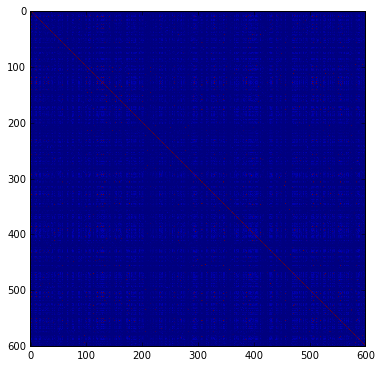

In [15]:
# visualising kernel matrix
plt.figure(figsize=(6,6))
plt.imshow(G)

## Оценка качества (1 балл)

Обучите метод опорных векторов с различными значениями параметра штрафа $C$.<br/>
Для каждого значения выведите accuracy на обучащюей и контрольной выборке.

Постарайтесь достичь качества в 70% на тестовой выборке

In [18]:
from sklearn.metrics import accuracy_score

In [20]:
C = [0.001, 0.01, 0.5, 1.5, 3, 7, 20, 100, 1000, 10000]
print("C   Train_Acc   Test_Acc")
for c in C:
    model = SVC(C=c, kernel=string_kernel)
    model.fit(X_train, Y_train)
    
    train_pred = model.predict(X_train)
    acc_train = accuracy_score(Y_train, train_pred)
    
    test_pred = model.predict(X_test)
    acc_test = accuracy_score(Y_test, test_pred)
    print("%s   %s   %s" % (c, acc_train, acc_test))

C   Train_Acc   Test_Acc
0.001   0.541666666667   0.5825
0.01   0.58   0.6025
0.5   0.991666666667   0.775
1.5   0.991666666667   0.775
3   0.991666666667   0.775
7   0.991666666667   0.775
20   0.991666666667   0.775
100   0.991666666667   0.775
1000   0.991666666667   0.775
10000   0.991666666667   0.775


Как можно заметить из значений качества на тестовой выборке, наивысшее качество (0.775) достигается при значениях параметра С от 0.5 и выше.